In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from pandas.util.testing import assert_frame_equal
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
def get_adj_closes(tickers,start_date=None, end_date=None, freq='d'):
    closes = web.YahooDailyReader(symbols=tickers, start=start_date, end=end_date, interval=freq).read()['Adj Close']
    closes.sort_index(inplace=True)
    return closes

In [3]:
names = ['^MXX','000001.SS','^DJI','^IBEX','^FCHI','^KS11']
start_date = '2012-06-04'
end_date = '2020-06-04'

In [4]:
closes = get_adj_closes(tickers = names,
                        start_date = start_date,
                        end_date= end_date
                       )

In [5]:
data = closes.pct_change().dropna()
data.describe()

Symbols         ^MXX    000001.SS         ^DJI        ^IBEX        ^FCHI  \
count    2042.000000  2042.000000  2042.000000  2042.000000  2042.000000   
mean        0.000007     0.000185     0.000385     0.000148     0.000276   
std         0.009075     0.013448     0.010467     0.013073     0.011708   
min        -0.064226    -0.084909    -0.129265    -0.140592    -0.122768   
25%        -0.004568    -0.004918    -0.002936    -0.005946    -0.005001   
50%         0.000000     0.000000     0.000341     0.000406     0.000352   
75%         0.005033     0.005833     0.004528     0.006589     0.005907   
max         0.042692     0.057635     0.113650     0.078184     0.083895   

Symbols        ^KS11  
count    2042.000000  
mean        0.000061  
std         0.008906  
min        -0.083937  
25%        -0.003637  
50%         0.000000  
75%         0.004329  
max         0.086012

In [6]:
Index_MXX = data.iloc[:,0:1]
Index_SS = data.iloc[:,1:2]
Index_DJI = data.iloc[:,2:3]
Index_IBEX = data.iloc[:,3:4]
Index_FCHI = data.iloc[:,4:5]
Index_KS11 = data.iloc[:,5:6]

In [7]:
MXX = np.asarray(Index_MXX)
SS = np.asarray(Index_SS)
DJI = np.asarray(Index_DJI)
IBEX = np.asarray(Index_IBEX)
FCHI = np.asarray(Index_FCHI)
KS11 = np.asarray(Index_KS11)

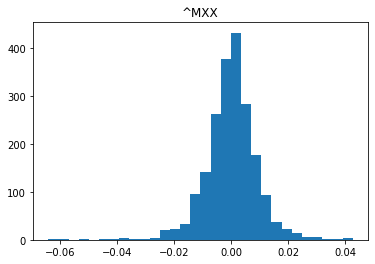

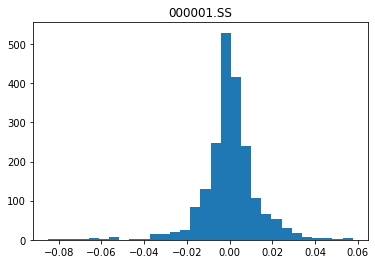

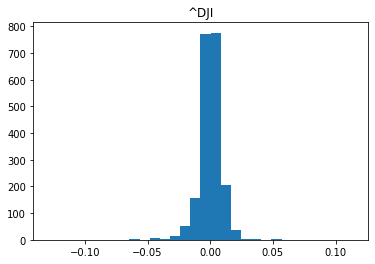

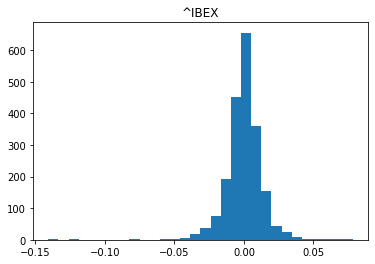

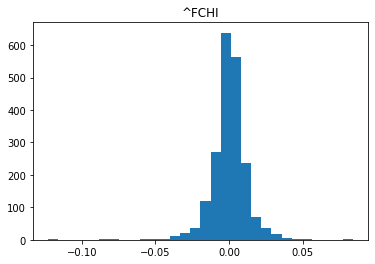

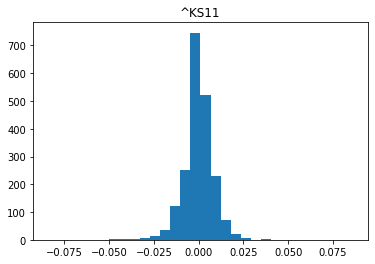

In [8]:
plt.hist(MXX,bins=30)
plt.title('^MXX')
plt.show()
plt.hist(SS,bins=30)
plt.title('000001.SS')
plt.show()
plt.hist(DJI,bins=30)
plt.title('^DJI')
plt.show()
plt.hist(IBEX,bins=30)
plt.title('^IBEX')
plt.show()
plt.hist(FCHI,bins=30)
plt.title('^FCHI')
plt.show()
plt.hist(KS11,bins=30)
plt.title('^KS11')
plt.show()

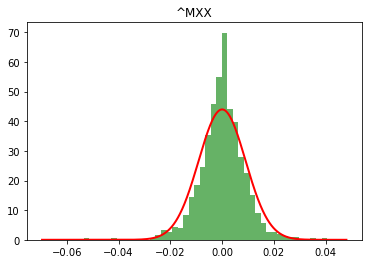

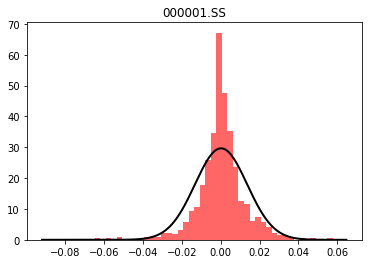

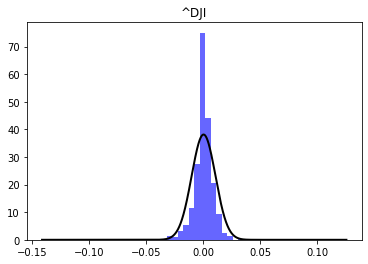

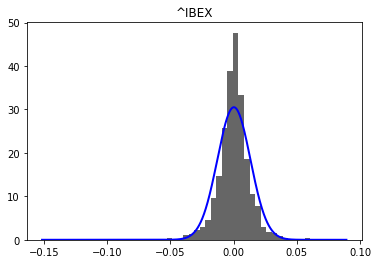

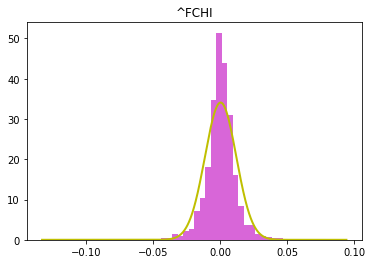

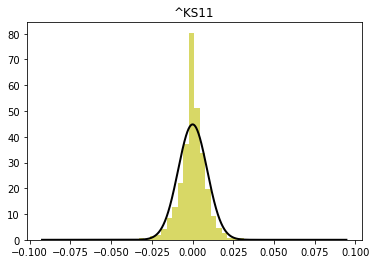

In [9]:
mu_M,std_M = norm.fit(MXX)
plt.hist(MXX,bins=50,density=True,alpha=0.6,color='g')
xmin_M,xmax_M = plt.xlim()
x_M = np.linspace(xmin_M,xmax_M,10000)
p_M = norm.pdf(x_M,mu_M,std_M)
plt.plot(x_M,p_M,'r',linewidth=2)
plt.title('^MXX')
plt.show()

mu_SS,std_SS = norm.fit(SS)
plt.hist(SS,bins=50,density=True,alpha=0.6,color='r')
xmin_SS,xmax_SS = plt.xlim()
x_SS = np.linspace(xmin_SS,xmax_SS,10000)
p_SS = norm.pdf(x_SS,mu_SS,std_SS)
plt.plot(x_SS,p_SS,'k',linewidth=2)
plt.title('000001.SS')
plt.show()

mu_DJI,std_DJI = norm.fit(DJI)
plt.hist(DJI,bins=50,density=True,alpha=0.6,color='b')
xmin_DJI,xmax_DJI = plt.xlim()
x_DJI = np.linspace(xmin_DJI,xmax_DJI,10000)
p_DJI = norm.pdf(x_DJI,mu_DJI,std_DJI)
plt.plot(x_DJI,p_DJI,'k',linewidth=2)
plt.title('^DJI')
plt.show()

mu_IBEX,std_IBEX = norm.fit(IBEX)
plt.hist(IBEX,bins=50,density=True,alpha=0.6,color='k')
xmin_IBEX,xmax_IBEX = plt.xlim()
x_IBEX = np.linspace(xmin_IBEX,xmax_IBEX,10000)
p_IBEX = norm.pdf(x_IBEX,mu_IBEX,std_IBEX)
plt.plot(x_IBEX,p_IBEX,'b',linewidth=2)
plt.title('^IBEX')
plt.show()

mu_FC,std_FC = norm.fit(FCHI)
plt.hist(FCHI,bins=50,density=True,alpha=0.6,color='m')
xmin_FC,xmax_FC = plt.xlim()
x_FC = np.linspace(xmin_FC,xmax_FC,10000)
p_FC = norm.pdf(x_FC,mu_FC,std_FC)
plt.plot(x_FC,p_FC,'y',linewidth=2)
plt.title('^FCHI')
plt.show()

mu_KS,std_KS = norm.fit(KS11)
plt.hist(KS11,bins=50,density=True,alpha=0.6,color='y')
xmin_KS,xmax_KS = plt.xlim()
x_KS = np.linspace(xmin_KS,xmax_KS,10000)
p_KS = norm.pdf(x_KS,mu_KS,std_KS)
plt.plot(x_KS,p_KS,'k',linewidth=2)
plt.title('^KS11')
plt.show()

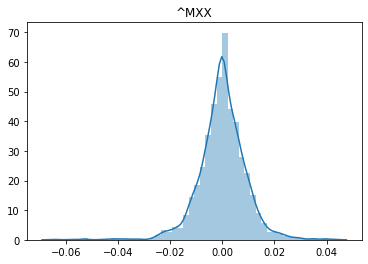

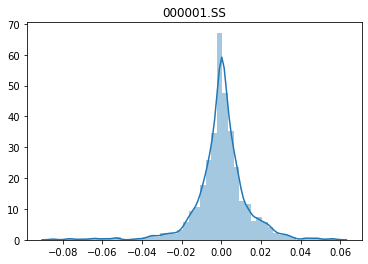

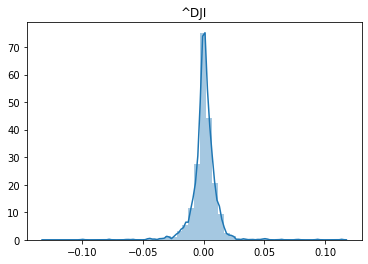

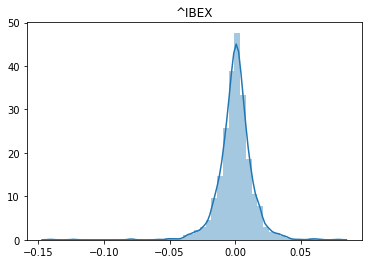

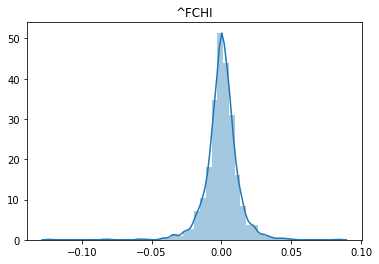

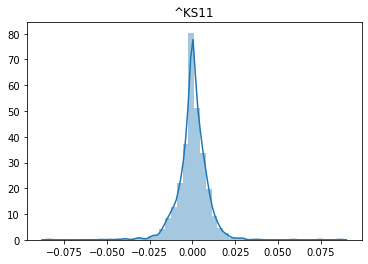

In [10]:
sns.distplot(MXX)
plt.title('^MXX')
plt.show()
sns.distplot(SS)
plt.title('000001.SS')
plt.show()
sns.distplot(DJI)
plt.title('^DJI')
plt.show()
sns.distplot(IBEX)
plt.title('^IBEX')
plt.show()
sns.distplot(FCHI)
plt.title('^FCHI')
plt.show()
sns.distplot(KS11)
plt.title('^KS11')
plt.show()

Text(0, 0.5, 'Frequency')

<Figure size 864x576 with 0 Axes>

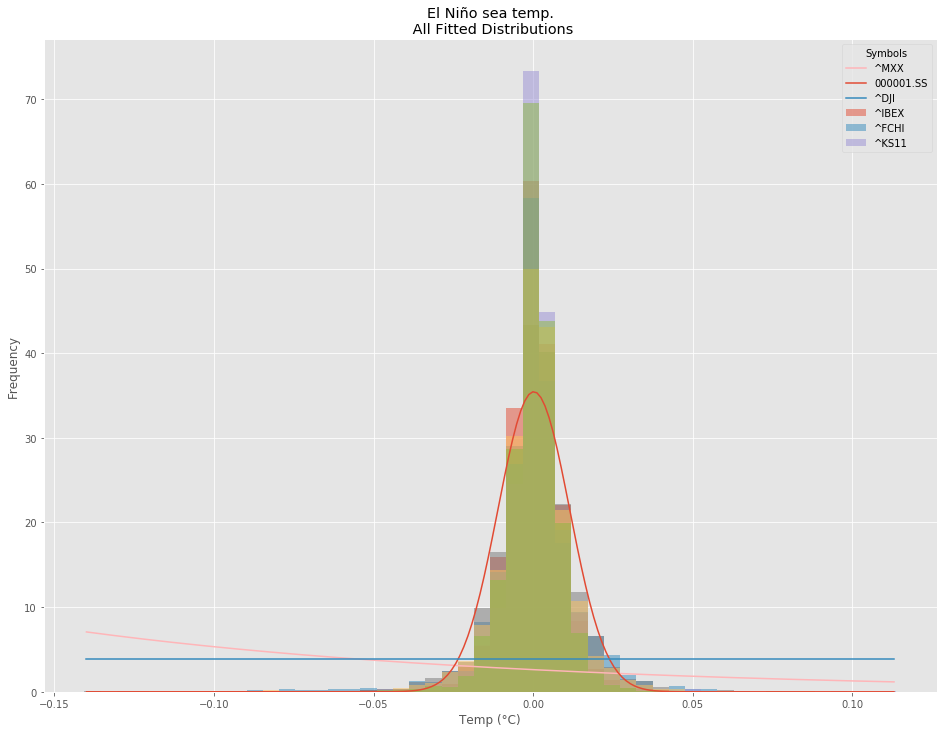

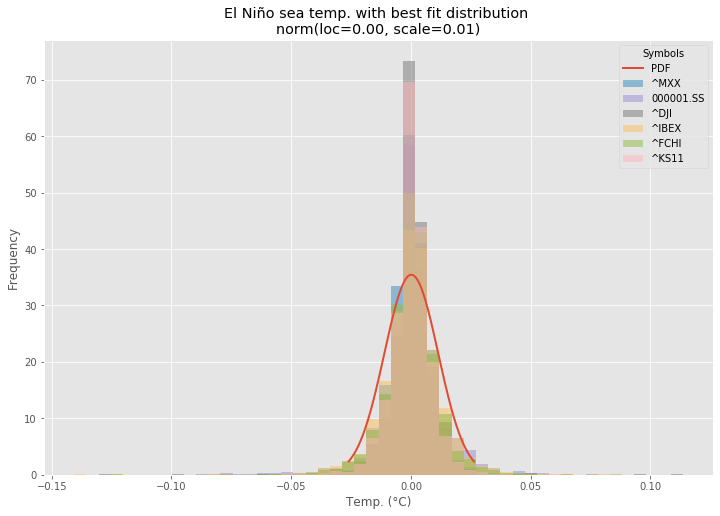

In [11]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
#data = pd.Series(.load_pandas().data.set_index('YEAR').values.ravel())

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind = 'hist', bins=50, density=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

In [12]:
JB = pd.DataFrame(columns=['^MXX','000001.SS','^DJI','^IBEX','^FCHI','^KS11'], index=['Jarque_Bera','0'])
JB['^MXX'] = st.jarque_bera(MXX)
JB['000001.SS'] = st.jarque_bera(SS)
JB['^DJI'] = st.jarque_bera(DJI)
JB['^IBEX'] = st.jarque_bera(IBEX)
JB['^FCHI'] =  st.jarque_bera(FCHI)
JB['^KS11'] = st.jarque_bera(KS11)
JB = JB.iloc[0:1,:]
JB

^MXX    000001.SS          ^DJI         ^IBEX  \
Jarque_Bera  2250.170487  4643.775872  83492.174012  16130.227413   

                    ^FCHI         ^KS11  
Jarque_Bera  11127.527314  15955.923673